# **Interpolação**
---
<ul>
  <li><a href="#scrollTo=6T7Gy-Docn5C&uniqifier=1">Interpolação</a>
  </li>
  <ul>
      <li><a href="#scrollTo=E2wcnL1ak8bG&uniqifier=1">Introdução</a></li>
    <li><a href="#scrollTo=pFFXXiPXkxvA&uniqifier=1">Funções comuns</a></li>
    <li><a href="#scrollTo=ytnsyQGrrANe">Método de Lagrange</a></li>
    <li><a href="#scrollTo=I0AnaO4OKRnb">Aplicações: Comparações</a></li>
    <li><a href="#scrollTo=I0AnaO4OKRnb">Aplicações: Splines</a></li>
  </ul>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [4]:
import time

# Decorator timeit
# Retorna o tempo de excução da função
# Não modifica a função.
# Para mais informações sobre decorators e timeit:
# https://medium.com/pythonhive/python-decorator-to-measure-the-execution-time-of-methods-fa04cb6bb36d
def timeit(method):
    def timed(*args, **kw):
        ts = time.time();
        result = method(*args, **kw);

        te = time.time();

        # Armazenar resultado
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__);
            kw['log_time'][name].append((te - ts) * 1000);
        else:
            print("%r  %2.5f ms" % (method.__name__, (te - ts) * 1000));
        return result
    return timed

In [5]:
def plot_curve_fit(xi, yi, x, y, color='b'):
  # Cria quadro
  fig, ax = plt.subplots(1,1, figsize=(15,6));

  # Centralizar eixos
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('center')

  # Plot time
  ax.plot(xi, yi, 'ro', x, y, color=color);

  plt.xlabel('x',fontsize='large') 
  plt.ylabel('y',fontsize='large') 

  plt.show();

# Introdução

A interpolação é um método de próxima $y(x)$ a partir de $n + 1$ pontos na forma $(x_i, y_i)$, para $i = 0, 1, ...,n \space$ e com $x_0 < x_1 < ... < x_n$.

A função estima será um polinomio de grau n, tal que $y_i = P_n(x_i)$ para todo  $0 \leq i \leq n$.

Pelo Teorema de Weierstrass, sabemos que se f: uma função contínua definida no intervalo fechado limitado [a, b], e seja δ um número positivo. Então existe um polinômio p, tal que para todo x ∈ [a, b],

> $|f(x) − p(x)| < δ.$

Assim, para cada $x_i$, podemos formar o seguinte sistema.
> $P_n(x) = $
>
> $a_0 + a_1*x^1_0 \cdots + a_n*x^n_0 = y_{0}$
>
> $a_0 + a_1*x^1_1 \cdots + a_n*x^n_1 = y_{1}$
>
> $\vdots$ 
>
> $a_0 + a_1*x^1_n \cdots + a_n*x^n_n = y_{n}$

O determinante desse sistema mostra que P é único se e somente se $det(A) \neq 0$.

> A = 
>
> $1 + x^1_1 \cdots + x^n_1$
>
> $1 + x^1_2 \cdots + x^n_2$
>
> $\vdots$ 
>
> $1 + x^1_n \cdots + x^n_n$

Essa é a matriz de Vandermonde e seu determinante pode ser calculado como:

$\det(A)=\prod _{1\leq i<j\leq n}(x_{j}-x_{i}) \neq 0$

Portanto, como $x_i \neq x_j$ P é único. 

Note, se temos $n$ pontos, então não podemos deduzir com precisão o polinônimio de grau $n$. Por exemplo, o problema estaria subdeterminado se tentassemos a partir de dois pontos aproximar um parábola, pois a parábola precisa de três pontos para determina-la. 

$f(x)=\left\{\begin{matrix}
  y_1 & = a_0 + a_1*x + a_2*x^2 \\
  y_2 & = a_0 + a_2*x + a_2*x^2 \\
\end{matrix}\right.$

O sistema acima tem infinitas soluções. 





In [6]:
# Interpola o vetor x e y. Retorna o polinomio com o maior grau a esquerda. 
@timeit
def interpolacao_matrix(x, y, **kwards):
  n = np.shape(x)[0];
  vander = np.vander(x, n);
  return np.linalg.solve(vander, y);

'interpolacao_matrix'  5.07903 ms


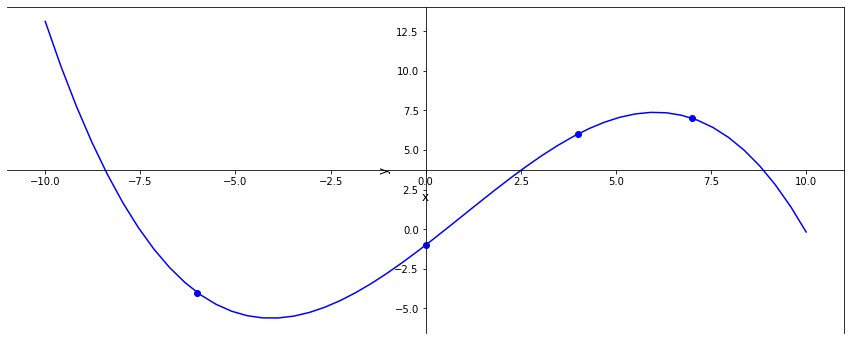

In [7]:
# Pontos
xi = np.array([-6, 0, 4, 7]);
yi = np.array([-4, -1, 6, 7]);

# Polinomio
p = interpolacao_matrix(xi, yi);

# Intervalo
t = np.linspace(-10, 10);
pt = np.polyval(p, t);

# Gráfico
plot_curve_fit(xi, yi, t, pt);

## Interpolação com Lagrange

A interpolação també pode ser obtida a partir da fórmula de Lagrange.

$P_n(x) = \sum_{i=0}^n y_i * l_i(x)$

Em que $l_i$ é:

$l_i = \prod_{j=0, i \neq j}^n (x - x_j) / (x_i - x_j)$

$ \space \\
$

O polinômio de Lagrange escreve $l_i$ de forma que $P(x_i) = y_i$:

$L_i(x_j)=\left\{\begin{matrix}
  0 & se & i \neq j \\
  1 & se & i = j \\ 
\end{matrix}\right.$
$ \space \\
$

Podemos visualizar isso melhor com o seguinte exemplo:

Se $l_i(x_i) = 1$, então $i = j$. Como no produtório o termo j salta quando é igual a i, então temos o seguinte produto (n = 2):
$ \space \\
$

$l_0(x_0) = (x_0 - x_1)(x_0 - x_2) / (x_0 - x_1)(x_0 - x_2) = 1$

$l_0(x_1) = (x_1 - x_1)(x_1 - x_2) / (x_0 - x_1)(x_0 - x_2) = 0\\
$

Assim, $P_n(x_i) = y_i$.

In [ ]:
@timeit
def interpolacao_lagrange(xi, yi, x, **kwards):
    n = np.size(xi);
    m = np.size(x); 
    
    L = np.ones((n,m));

    for i in np.arange(n):
        for j in np.arange(n):
            if(i != j):
                L[i,:] = (L[i,:]*(x-xi[j]))/(xi[i]-xi[j]);

    y = np.dot(yi, L);
    return y;

'interpolacao_lagrange'  0.30947 ms


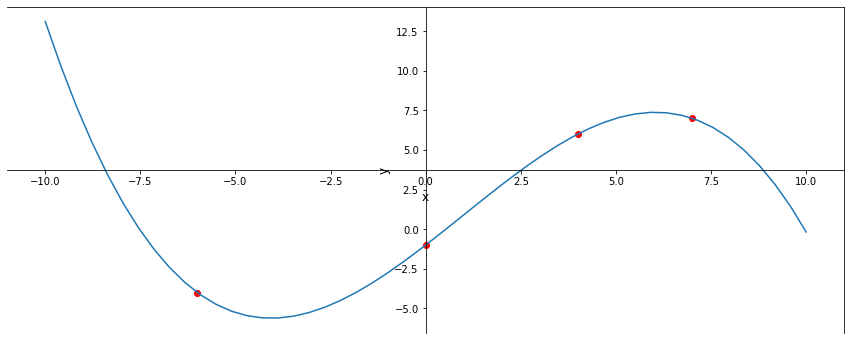

In [ ]:
# Pontos
xi = np.array([-6, 0, 4, 7]);
yi = np.array([-4, -1, 6, 7]);

# Intervalo
x = np.linspace(-10, 10);

# Polinomio
y = interpolacao_lagrange(xi, yi, t);

# Gráfico
plot_curve_fit(xi, yi, x, y);

In [ ]:
from scipy.interpolate import lagrange

@timeit
def lagrande_method(x, y, **kwards):
  return lagrange(x, y);

In [ ]:
def compare_methods():
  # Tempo gerado por execução
  logtime_data = {
     "interpolacao_linear": [],
     "interpolacao_lagrange" : [],
     "lagrande_method": []
  }

  # Intervalo
  x_sample = []
  for i in range(5, 10):
    x_sample.append(i);
    x = np.linspace(-i, i, 500);
    y = np.random.randint(-i, i, 500);
    t = np.linspace(-i, i, 1);

    lagrande_method(x, y, log_time= logtime_data);
    interpolacao_lagrange(x, y, t, log_time= logtime_data);
    interpolacao_linear(x, y, log_time= logtime_data);

  # Quadro do plot  
  fig = plt.figure(figsize=(12,6));
  ax = fig.add_subplot(111);
  
  # Plot time
  ax.plot(x_sample, logtime_data.get("lagrande_method"), 'b', label= "lagrande_method" + " time",  linewidth=3.5);
  ax.plot(x_sample, logtime_data.get("interpolacao_lagrange"), 'y', label= "interpolacao_lagrange" + " time",  linewidth=3.5);
  ax.plot(x_sample, logtime_data.get("interpolacao_linear"), 'r', label= "interpolacao_linear" + " time",  linewidth=3.5);

  # Legendas
  ax.set(title="Tempo(s) de execução em função do range", xlabel="Tamanho n", ylabel="Tempo(ms)");
  ax.legend(loc="best", fontsize='large');
  
  plt.show();

A Interpolação de Newton é feita escrevendo o polinômio na forma:

> $P_n(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + ... + a_n(x-x_0)...(x-x_{n-1})$

E a cada $x_i$ geramos o seguinte sistema: 

> $P_n(x) = $
>
> $a_0 \space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space=\space y_{0}$
>
> $a_0 + a_1*(x_1 - x_0)\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space =\space y_{1}$
>
> $\vdots$ 
>
> $a_0 + a_1*(x_n - x_0) \cdots + a_n*(x_n - x_0)* ... *(x_n - x_{n-1}) = y_{n}$

Então, calculando os coeficientes desse polinômio,


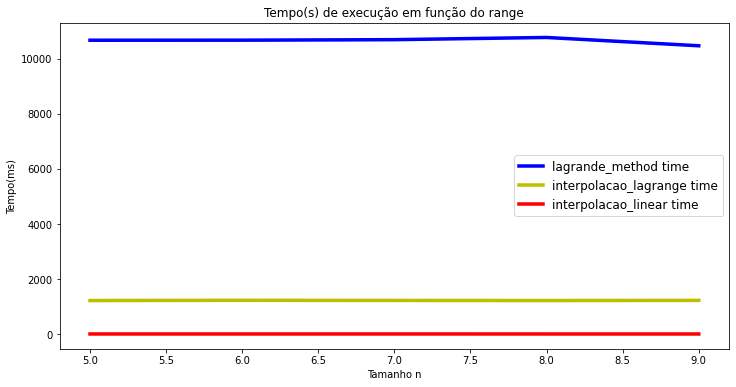

In [ ]:
compare_methods();

## Erros

Nesse exemplo a seguir, podemos ver que a interpolação gera um erro em relação a curva original.

'interpolacao_linear'  0.11826 ms
'interpolacao_lagrange'  1.20759 ms
'lagrande_method'  8.86393 ms


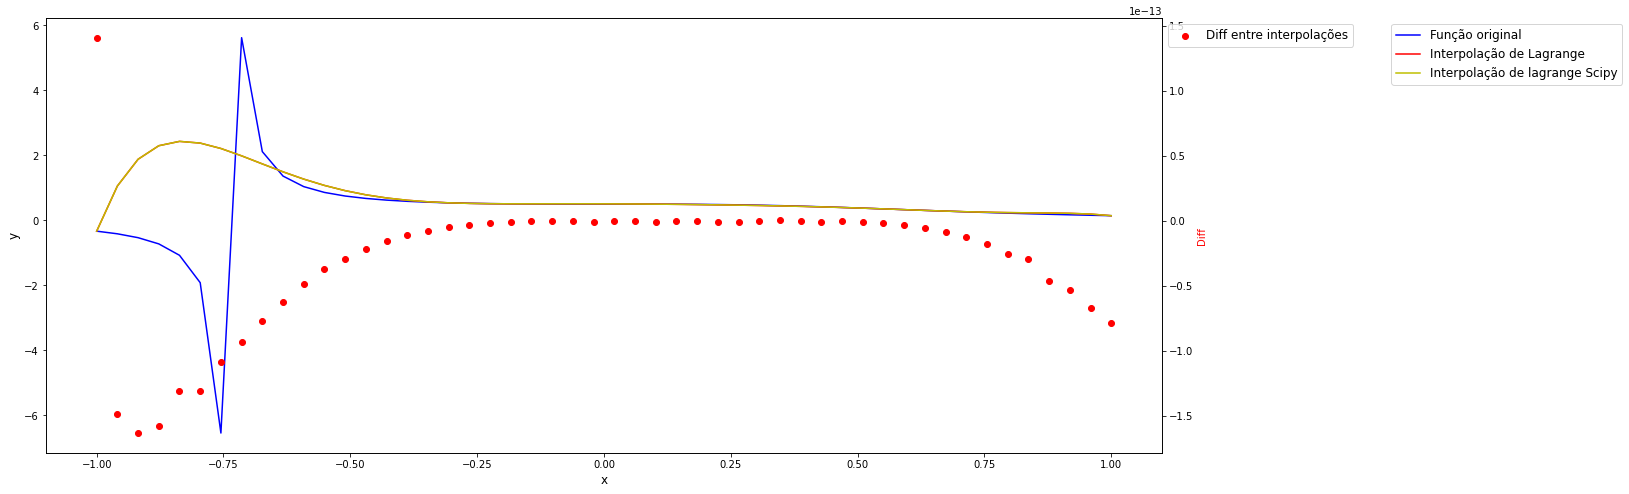

In [ ]:
def func(x):
  return 1/ (2 + (5*x**3));

x = np.linspace(-1, 1);
y = func(x);

# Interpolação
x_approx = np.array([-1, -0.65, -0.3, -0.20, 0.1, 0.55, 0.58, 0.65, 1]);
y_approx = func(x_approx);

# Polinomio
p = interpolacao_linear(x_approx, y_approx);
pt = np.polyval(p, x);

pl = interpolacao_lagrange(x_approx, y_approx, x);
p2 = lagrande_method(x_approx, y_approx).coef;
pl2 = np.polyval(p2, x);

# Comparação das curvas geradas
# Cria quadro
fig, ax = plt.subplots(1,1, figsize=(20,8));

# Plot Curve
ax.plot(x, y, color='b', label='Função original');
ax.plot(x, pl, color='r', label='Interpolação de Lagrange');
ax.plot(x, pl2, color='y', label='Interpolação de lagrange Scipy');

# Plot Diff
ax2 = ax.twinx();
ax2.scatter(x, np.abs(pl2) - np.abs(pl), marker='o', color='r', label='Diff entre interpolações');

ax.set_xlabel('x',fontsize='large') 
ax.set_ylabel('y',fontsize='large') 

ax2.set_ylabel('Diff', color='r');

ax.legend(loc="upper left", fontsize='large', bbox_to_anchor=(1.2,1));
ax2.legend(loc="upper left", fontsize='large', bbox_to_anchor=(1,1));

plt.show();

## Splines


Podemos ver pelo gráfico anterior que a interpolação polinôminal gera discrepâncias ao longo da função. Esse erro tende a aumentar conforme mais pontos são necessários. Então uma abordagem para resolver esse problema é segmentar o intervalo.


### Interpolação linear Segmentada

Mostraremos primeiro essa interpolação como uma itrodução do spline. A interpolação linear entre dois pontos é o segmento de reta que estes determinam. Logo, dado $(x_1, y_1), (x_2, y_2)$:

$y = y_1 + (y_2 - y_1)(x - x_1) \div (x_2 - x_1)$

Em que $(y_2 - y_1) \div(x_2 - x_1)$ é a tangente do angulo entre a reta formada e o eixo-x. 

Assim, podemos generalizar, para qualquer $x \in [x_i, x_{i+1}]$, vale: 

### $y = y_i + (y_{i+1} - y_i)(x - x_i) \div (x_{i+1} - x_i)$

Para facilitar o calculo durante o algoritmo, a equação acima é manipulada para ficar:

### $y = y_i(x_{i+1} - x)\div(x_{i+1} - x_i) + y_{i+1}(x - x_i) \div (x_{i+1} - x_i)$



In [29]:
def interpolacao_linear(xi, yi, x):
  n = np.shape(xi)[0];
  for i in np.arange(n-1):
    if(xi[i] <= x and x <= xi[i+1]):
      return (yi[i]*(xi[i+1]-x)/(xi[i+1]-xi[i])) +  (yi[i+1]*(x-xi[i])/(xi[i+1]-xi[i]));

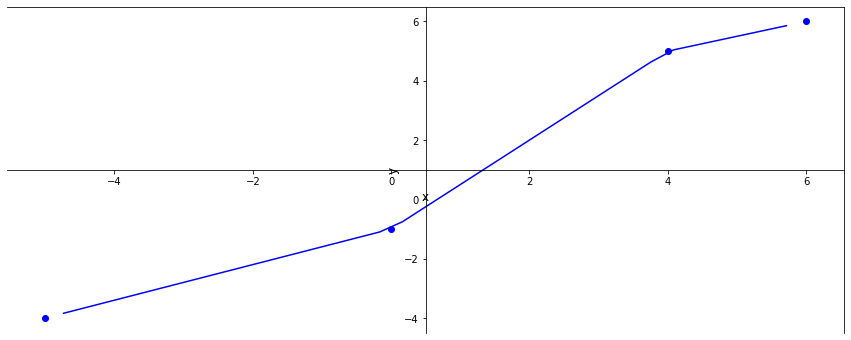

In [40]:
# Pontos
xi = np.array([-5, 0, 4, 6]);
yi = np.array([-4, -1, 5, 6]);

# Intervalo
x = np.linspace(-8, 8);

# Polinomio
y = [];
for i in x:
  y.append(interpolacao_linear(xi, yi, i));

# Gráfico
plot_curve_fit(xi, yi, x, y);

Splines Cúbicos


## Referências

[1] Afonso Paiva,ICMC-USP, youtube, disponível em: https://www.youtube.com/watch?v=u_hv5sYuNEE&list=PLQKmAYRxso40MKGiFVSLsVa4tq3F5Q3zl&index=11

[2] I. Q. Barros, Introducao ao Calculo Numerico, USP-Edgard Blucher, Capitulo 1, 2 e 4. Disponível em: https://www.ime.usp.br/~colli/cursos/NumericoIAG-2005/

[3] REAMAT, UFRGS, Introdução a cálculo numérico, disponível em: http://www.mat.ufrgs.br/~guidi/grad/MAT01169/livro-sci.pdf

Além disso, foi usado o conteúdo disponilizado nas aulas de Cálculo Númerico SME0104-2020.